# Problem 2

Given a set of Images that describe the stage of dementia in Alzheimer patients. Each folder has a name that represents the label of the images inside it. according to the class label of dementia: Very Mild, Mild, moderate, None demented.

In [ ]:
from sklearn import metrics
from keras import models
from keras import layers
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow import keras

from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import math 
import os
import warnings
warnings.filterwarnings("ignore")

## Explor Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


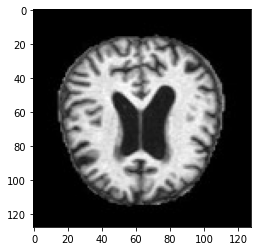

In [ ]:
DataDirectuin ="/content/drive/MyDrive/Machine Learning/Dataset"
labels=["Mild_Demented", "Moderate_Demented", "Non_Demented", "Very_Mild_Demented"]

for l in labels:
  path= os.path.join(DataDirectuin,l)
  for img in os.listdir(path):
    img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break    

In [ ]:
print(img_array)
print(img_array.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(128, 128)


so image dimention 128 * 128

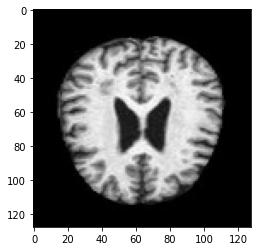

In [ ]:
new_array=cv2.resize(img_array,(128,128))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
Data_train =[]
def trining_Data():
  for l in labels:
    path= os.path.join(DataDirectuin,l)
    class_number = labels.index(l)
    for img in os.listdir(path):
      try:
        img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(128,128))
        Data_train.append([new_array,class_number])
      except Exception as e:
        pass

trining_Data()

In [ ]:
print(len(Data_train))

6400


In [ ]:
import random 
random.shuffle(Data_train)


In [ ]:
for i in Data_train[:10]:
  print(i[1])

2
3
2
2
3
3
2
2
2
2


so index for label 0,1,2,3

In [ ]:
x = []
y = []
for features , label in Data_train:
  x.append(features)
  y.append(label)

x =np.array(x).reshape(-1,128,128,1)


y =  np.array(y)

In [ ]:
import pickle

pickle_out =open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out =open("y.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

In [ ]:
pickle_in =open("x.pickle","rb")
x=pickle.load(pickle_in)




In [ ]:
x[1]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [ ]:
x= np.array(x).reshape(-1, 128,128,1)
y =  np.array(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(    x, y, test_size=0.3 )

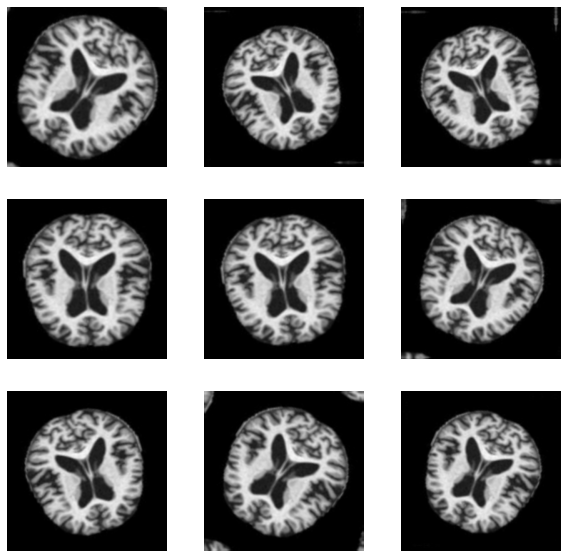

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
print(len(x_train),
len(x_test),
len(y_train),
len(y_test))

4480 1920 4480 1920


In [ ]:
classes=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

##another way to upload

first value of split is 0.8 that means 80% of the data will be used as training data and the second value of split is 0.2 that means 20% of the data will be used as testing data.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Machine Learning/Final Project/Dataset',
  validation_split=0.2,
  subset="training",
  seed=123,
  #image_size=(img_height, img_width),
  #batch_size=batch_size
  )

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Machine Learning/Final Project/Dataset',
  validation_split=0.2,
  subset="validation",
  seed=123,
  #image_size=(img_height, img_width),
 # batch_size=batch_size
 )

Found 1150 files belonging to 4 classes.
Using 230 files for validation.


In [ ]:
val_train, val_test = val_ds.map(lambda x, y: x), val_ds.map(lambda x, y: y)


Cause: could not parse the source code of <function <lambda> at 0x7fa53555c3a0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa53555c3a0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa5355e1e50>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa5355e1e50>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
x_train, y_train = train_ds.map(lambda x, y: x), train_ds.map(lambda x, y: y)
x_test, y_test = val_ds.map(lambda x, y: x), val_ds.map(lambda x, y: y)


Cause: could not parse the source code of <function <lambda> at 0x7fa53b8fef70>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa53b8fef70>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa52fc9e1f0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa52fc9e1f0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa542121e50>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa542121e50>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa53bd27ee0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa53bd27ee0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x, y: x)

Match 1:
(lambda x, y: y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


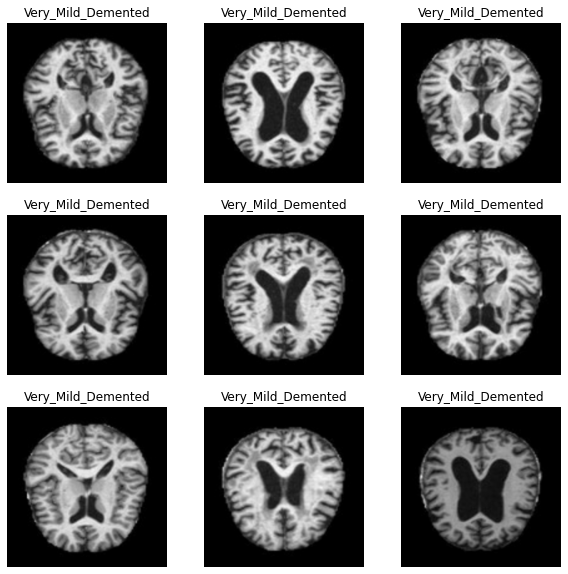

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
#This is a batch of 32 images of shape 256x256x3 (the last dimension refers to color channels RGB)  

(32, 256, 256, 3)
(32,)


In [ ]:
train_ds.class_names

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

### preparation Data

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9301471


## Que 1

Develop appropriate Artificial Neural Network model to predict the status of patient?

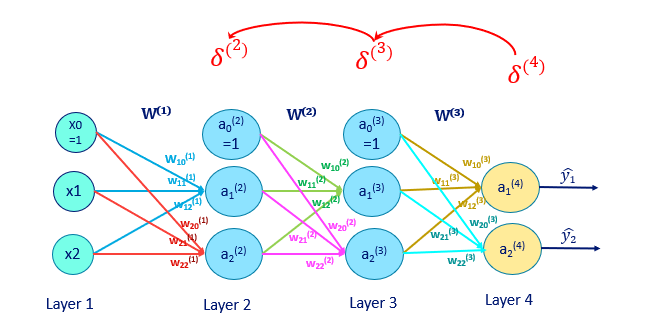

In [ ]:
# Data= train_datagen.flow_from_directory(
#      '/content/drive/MyDrive/Machine Learning/Final Project/Dataset',
#      target_size=(128 , 128),batch_size=64, color_mode= 'grayscale')

In [ ]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    layers.Dropout(0.5),
    keras.layers.Dense(32, activation=tf.nn.relu),
   
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history= model_1.fit(x_train, y_train, epochs=10)

Epoch 1/10
140/140 [==============================] - 2s 11ms/step - loss: 40.5671 - accuracy: 0.4748
Epoch 2/10
140/140 [==============================] - 2s 11ms/step - loss: 2.2591 - accuracy: 0.5029
Epoch 3/10
140/140 [==============================] - 2s 11ms/step - loss: 1.1514 - accuracy: 0.5029
Epoch 4/10
140/140 [==============================] - 2s 11ms/step - loss: 1.1109 - accuracy: 0.5029
Epoch 5/10
140/140 [==============================] - 2s 11ms/step - loss: 1.0864 - accuracy: 0.5029
Epoch 6/10
140/140 [==============================] - 2s 11ms/step - loss: 1.0710 - accuracy: 0.5029
Epoch 7/10
140/140 [==============================] - 2s 11ms/step - loss: 1.0609 - accuracy: 0.5029
Epoch 8/10
140/140 [==============================] - 2s 11ms/step - loss: 1.0539 - accuracy: 0.5029
Epoch 9/10
140/140 [==============================] - 2s 11ms/step - loss: 1.0490 - accuracy: 0.5029
Epoch 10/10
140/140 [==============================] - 2s 11ms/step - loss: 1.0454 - accur

In [ ]:
test_loss, test_acc = model_1.evaluate(x_test,y_test)
print('Test accuracy:', test_acc)

60/60 [==============================] - 1s 6ms/step - loss: 1.0712 - accuracy: 0.5057
Test accuracy: 0.5057291388511658


In [ ]:
y_hat=model_1.predict(x_test)#x test
y_hat=np.around(y_hat)
y_hat[0]
x=np.argmax(y_hat[0])
classes[x]

60/60 [==============================] - 0s 6ms/step


'Mild_Demented'

(0.0, 3.0)

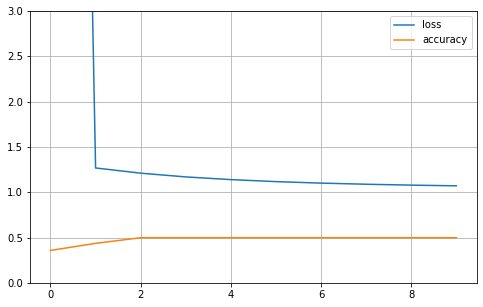

In [ ]:
import pandas as pd
plt=pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.set_ylim(0, 3) # set the vertical ra   

### other model but the best model up with differnt layar and optimizer

In [ ]:
model_3 = models.Sequential([
        layers.Flatten(input_shape=(128,128)),
        layers.Dense(900, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(600, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(300, activation='relu'),
        layers.Dense(4, activation='softmax')    
    ])
model_3.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_3.fit(x_train, y_train, epochs=5)

Epoch 1/5
140/140 [==============================] - 15s 101ms/step - loss: 142.2711 - accuracy: 0.4156
Epoch 2/5
140/140 [==============================] - 17s 122ms/step - loss: 1.8230 - accuracy: 0.4900
Epoch 3/5
140/140 [==============================] - 16s 113ms/step - loss: 1.3172 - accuracy: 0.4971
Epoch 4/5
140/140 [==============================] - 16s 117ms/step - loss: 1.2810 - accuracy: 0.4984
Epoch 5/5
140/140 [==============================] - 14s 100ms/step - loss: 1.2558 - accuracy: 0.5007


In [ ]:
test_loss, test_acc = model_3.evaluate(x_test,y_test)
print('Test accuracy:', test_acc)

60/60 [==============================] - 2s 37ms/step - loss: 1.2433 - accuracy: 0.5063
Test accuracy: 0.5062500238418579


In [ ]:
model_4 = models.Sequential([
        layers.Flatten(input_shape=(128,128)),
        layers.Dense(1000, activation='sigmoid'),
        layers.Dense(500, activation='relu'),
        layers.Dense(400, activation='sigmoid'),
        layers.Dense(300, activation='relu'),
        layers.Dense(4, activation='softmax')    
    ])



model_4.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_4.fit(x_train, y_train, epochs=5)

Epoch 1/5
140/140 [==============================] - 24s 166ms/step - loss: 1.0570 - accuracy: 0.4717
Epoch 2/5
140/140 [==============================] - 12s 88ms/step - loss: 1.0408 - accuracy: 0.4810
Epoch 3/5
140/140 [==============================] - 12s 86ms/step - loss: 1.0413 - accuracy: 0.4859
Epoch 4/5
140/140 [==============================] - 12s 86ms/step - loss: 1.0376 - accuracy: 0.4871
Epoch 5/5
140/140 [==============================] - 12s 86ms/step - loss: 1.0413 - accuracy: 0.4893


In [ ]:
test_loss, test_acc = model_4.evaluate(x_test,y_test)
print('Test accuracy:', test_acc)

60/60 [==============================] - 2s 37ms/step - loss: 1.0523 - accuracy: 0.5057
Test accuracy: 0.5057291388511658


In [ ]:
models=[model_1,model_3,model_4]
for i in models:
  from sklearn.metrics import classification_report
  classes=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
  pred=(i).predict(x_test)
  idx= [np.argmax(x) for x in pred]
  print(idx)
  print(y_test)
  print(classification_report(y_test, idx))

60/60 [==============================] - 0s 6ms/step
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [ ]:
model = models.Sequential() #models from keras
model.add(layers.Flatten())
model.add(layers.Dense(784, activation='relu', input_shape=(128 * 128,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64,  activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(x_train,y_train,epochs=epochs)

Epoch 1/10
140/140 [==============================] - 7s 47ms/step - loss: 1.1128 - accuracy: 0.4712
Epoch 2/10
140/140 [==============================] - 9s 62ms/step - loss: 1.0600 - accuracy: 0.4763
Epoch 3/10
140/140 [==============================] - 8s 60ms/step - loss: 1.0521 - accuracy: 0.4748
Epoch 4/10
140/140 [==============================] - 8s 59ms/step - loss: 1.0515 - accuracy: 0.4770
Epoch 5/10
140/140 [==============================] - 9s 65ms/step - loss: 1.0427 - accuracy: 0.4850
Epoch 6/10
140/140 [==============================] - 7s 49ms/step - loss: 1.0451 - accuracy: 0.4886
Epoch 7/10
140/140 [==============================] - 6s 45ms/step - loss: 1.0441 - accuracy: 0.4875
Epoch 8/10
140/140 [==============================] - 6s 45ms/step - loss: 1.0391 - accuracy: 0.4946
Epoch 9/10
140/140 [==============================] - 6s 45ms/step - loss: 1.0409 - accuracy: 0.4946
Epoch 10/10
140/140 [==============================] - 7s 46ms/step - loss: 1.0448 - accura

In [ ]:
y_hat=model.predict(x_test)#x test

60/60 [==============================] - 1s 15ms/step


In [ ]:
from sklearn.metrics import classification_report
classes=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
pred=model.predict(X_test)
idx= [np.argmax(x) for x in pred]
print(idx)
print(y_test)
print(classification_report(y_test, idx))

60/60 [==============================] - 1s 18ms/step
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test accuracy:', test_acc)

60/60 [==============================] - 1s 16ms/step - loss: 1.0471 - accuracy: 0.5000
Test accuracy: 0.5


In [ ]:
y_hat=model.predict(x_test)#x test
y_hat=np.around(y_hat)
y_hat[0]

60/60 [==============================] - 1s 15ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x=np.argmax(y_hat[0])
classes[x]

'Mild_Demented'

## Que 2

Develop appropriate Deep Learning model using TensorFlow to predict the status of patient? Describe what type of deep learning did you use and Show the loss and accuracy curves?

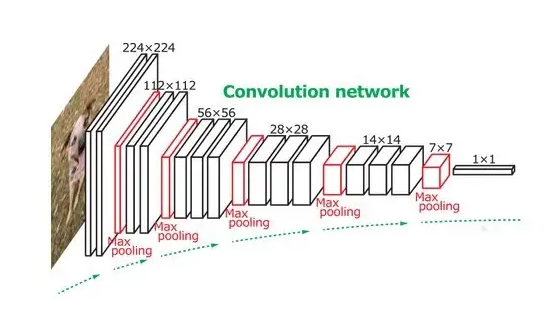

In [ ]:
#deep convenutiona neural network
cnn= models.Sequential([
    layers.Input(shape=(128,128,1)),#1st layer input layer : image --> define shape 
    #128-3+1=126 
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),# parametrs : num of filters : k, kernal size : shape filter, define activation fun
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),# parametrs : num of filters : k, kernal size : shape filter, define activation fun
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(4, activation='softmax')  
]) # in seguential 


In [ ]:
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
140/140 [==============================] - 157s 1s/step - loss: 1.1405 - accuracy: 0.4967
Epoch 2/10
140/140 [==============================] - 150s 1s/step - loss: 1.0476 - accuracy: 0.4975
Epoch 3/10
140/140 [==============================] - 155s 1s/step - loss: 1.0389 - accuracy: 0.4975
Epoch 4/10
140/140 [==============================] - 150s 1s/step - loss: 1.0369 - accuracy: 0.4975
Epoch 5/10
140/140 [==============================] - 149s 1s/step - loss: 1.0354 - accuracy: 0.4975
Epoch 6/10
140/140 [==============================] - 145s 1s/step - loss: 1.0348 - accuracy: 0.4975
Epoch 7/10
140/140 [==============================] - 152s 1s/step - loss: 1.0341 - accuracy: 0.4975
Epoch 8/10
140/140 [==============================] - 146s 1s/step - loss: 1.0388 - accuracy: 0.4975
Epoch 9/10
140/140 [==============================] - 151s 1s/step - loss: 1.0369 - accuracy: 0.4975
Epoch 10/10
140/140 [==============================] - 146s 1s/step - loss: 1.0344 - accura

In [ ]:
test_loss, test_acc = cnn.evaluate(x_test,y_test)
print('Test accuracy:', test_acc)

60/60 [==============================] - 15s 253ms/step - loss: 1.0406 - accuracy: 0.5057
Test accuracy: 0.5057291388511658


In [ ]:
from sklearn.metrics import classification_report
classes=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
pred=cnn.predict(x_test)
idx= [np.argmax(x) for x in pred]
print(idx)
print(y_test)
print(classification_report(y_test, idx))

60/60 [==============================] - 13s 213ms/step
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [ ]:

# in parallel to define diff types in differnt filters(layers)
inp= layers.Input(shape=(128,128,1))
con1= layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu')(inp)
con2= layers.Conv2D(filters=5, kernel_size=(3,3), activation='relu')(inp)
pool1= layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(con1)
pool2= layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(con2)

pool3 = layers.concatenate([pool1,pool2])
f1= layers.Flatten()(pool3)
dens1= layers.Dense(20, activation='sigmoid')(f1)
dens2= layers.Dense(4, activation='softmax')(dens1)
cnn2= models.Model(inputs= inp, outputs= dens2)  

In [ ]:
cnn2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn2.fit(x_train, y_train, epochs=5)

Epoch 1/5
160/160 [==============================] - 48s 299ms/step - loss: 1.0459 - accuracy: 0.4981
Epoch 2/5
160/160 [==============================] - 50s 312ms/step - loss: 0.9970 - accuracy: 0.5290
Epoch 3/5
160/160 [==============================] - 51s 315ms/step - loss: 0.9701 - accuracy: 0.5423
Epoch 4/5
160/160 [==============================] - 48s 298ms/step - loss: 0.9461 - accuracy: 0.5503
Epoch 5/5
160/160 [==============================] - 50s 312ms/step - loss: 0.9240 - accuracy: 0.5603


In [ ]:
test_loss, test_acc = cnn2.evaluate(x_test,y_test)
print('Test accuracy:', test_acc)

41/41 [==============================] - 7s 164ms/step - loss: 0.9230 - accuracy: 0.5385
Test accuracy: 0.538521409034729


In [ ]:
from sklearn.metrics import classification_report
classes=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
pred=cnn.predict(x_test)
idx= [np.argmax(x) for x in pred]
print(idx)
print(y_test)
print(classification_report(y_test, idx))

41/41 [==============================] - 4s 107ms/step
[2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3,

In [ ]:
classes=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
classes[3]

'Very_Mild_Demented'

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
160/160 [==============================] - 112s 698ms/step - loss: 0.9620 - accuracy: 0.5533
Epoch 2/10
160/160 [==============================] - 115s 719ms/step - loss: 0.5733 - accuracy: 0.7603
Epoch 3/10
160/160 [==============================] - 111s 694ms/step - loss: 0.2466 - accuracy: 0.9103
Epoch 4/10
160/160 [==============================] - 109s 682ms/step - loss: 0.0891 - accuracy: 0.9754
Epoch 5/10
160/160 [==============================] - 110s 690ms/step - loss: 0.0580 - accuracy: 0.9824
Epoch 6/10
160/160 [==============================] - 110s 688ms/step - loss: 0.0165 - accuracy: 0.9977
Epoch 7/10
160/160 [==============================] - 109s 680ms/step - loss: 0.0054 - accuracy: 0.9998
Epoch 8/10
160/160 [==============================] - 110s 688ms/step - loss: 0.0151 - accuracy: 0.9967
Epoch 9/10
160/160 [==============================] - 111s 691ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/10
160/160 [==============================] - 110s 685m

In [ ]:
cnn.evaluate(x_test,y_test)

41/41 [==============================] - 8s 194ms/step - loss: 0.6589 - accuracy: 0.8132


[0.6589165329933167, 0.8132295608520508]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

41/41 [==============================] - 7s 174ms/step


array([[9.97726023e-01, 7.05510029e-05, 1.61808115e-04, 2.04171310e-03,
        6.95167498e-19, 4.47280678e-17, 7.41580546e-22, 5.52781074e-19,
        4.39388117e-17, 2.21797152e-16],
       [9.99997914e-01, 3.91150445e-11, 9.41635392e-09, 2.06583218e-06,
        3.64206233e-24, 3.95308968e-24, 2.09669662e-28, 3.42687409e-24,
        4.59598593e-21, 1.33344350e-20],
       [9.99753237e-01, 9.80752257e-10, 1.39676849e-05, 2.32855367e-04,
        2.22099885e-20, 5.74917223e-21, 1.44194165e-23, 3.47010385e-21,
        5.74295576e-18, 2.22076364e-18],
       [6.78109229e-01, 1.27229396e-06, 5.52305840e-02, 2.66658872e-01,
        3.49876048e-19, 9.33752288e-19, 1.99704707e-22, 6.40243691e-21,
        1.09691892e-17, 3.59672565e-18],
       [1.02133993e-02, 8.62627374e-08, 8.90108407e-01, 9.96780470e-02,
        1.69927222e-19, 8.02057974e-20, 1.33977902e-22, 4.55915357e-22,
        4.34080190e-18, 1.05365006e-19]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 2]

In [ ]:
classes=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

## Que 3

What are the parameters that you used to configure your model; describe how did you tune your module?

In [ ]:
#all notes in my document describe about each parameter and layers 

#about tune parameter :in question (1) i applay differnt type of optimzers and acctivation function ,i chosse adam as optimzer and activation function relu --> high accurcy 

## Que 4

Can we apply LSTM and GAN for such problems, explain your answer with evidence?

In [ ]:
# from keras.layers import Input, LSTM, Dense
# from keras.models import Model

# # Input layer for the image data
# inputs = Input(shape=(128, 128,1 ))

# # LSTM layer
# lstm = LSTM(128, return_sequences=True)(inputs)

# # Dense layer for classification
# outputs = Dense(4, activation='softmax')(lstm)

# # Create the model
# model = Model(inputs, outputs)

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# NO

In [ ]:
model.fit(X_train,y_train,epochs=5)

Recurrent neural networks (RNNs) of the Long Short-Term Memory (LSTM) type are particularly effective at handling sequential data, such as time series or text. By treating a picture as a series of pixels to be processed in time steps, they are also used to handle image data. the architecture with a single dense layer and an LSTM layer. As you can see, the image data is used as the input for the LSTM layer and is then reshaped to have the shape (256,256,1). The return sequence is set to true because the LSTM layer, which has 256 units, is used to analyze sequential data. Dense layer receives the output from LSTM and classifies it; it has a number of classes and an activation function called "softmax" that produces probability values for each class.